In [20]:
# # Installing Packages
# options(repos = c(CRAN="https://cloud.r-project.org"))
# install.packages(c('deSolve'))

Installing package into 'C:/Users/Sarthak Vishnoi/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'deSolve' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sarthak Vishnoi\AppData\Local\Temp\RtmpMjDrAx\downloaded_packages


In [40]:
library(dynlm)
library(car)
library(carData)
library(zoo)
library(xts)
library(tsbox)
library(tseries)
library(forecast)

## Making the xts object

In [2]:
# Making an xts object for the data
india <- as.data.frame(read.csv("../../Data/India_Time_Series.csv", sep = ",", colClasses=c("character","numeric", "numeric", "numeric", "numeric", "numeric", "numeric", "numeric")))
head(india)
india$Date <- as.Date(india$Date , format = "%d-%b")
india.xts <- xts(india, order.by=india$Date)
india.xts <- india.xts[, colnames(india.xts) != "Date"]

Date,Daily.Confirmed,Total.Confirmed,Daily.Recovered,Total.Recovered,Daily.Deceased,Total.Deceased,Lockdown
30-Jan,1,1,0,0,0,0,0
31-Jan,0,1,0,0,0,0,0
01-Feb,0,1,0,0,0,0,0
02-Feb,1,2,0,0,0,0,0
03-Feb,1,3,0,0,0,0,0
04-Feb,0,3,0,0,0,0,0


## Plotting the relevant Data

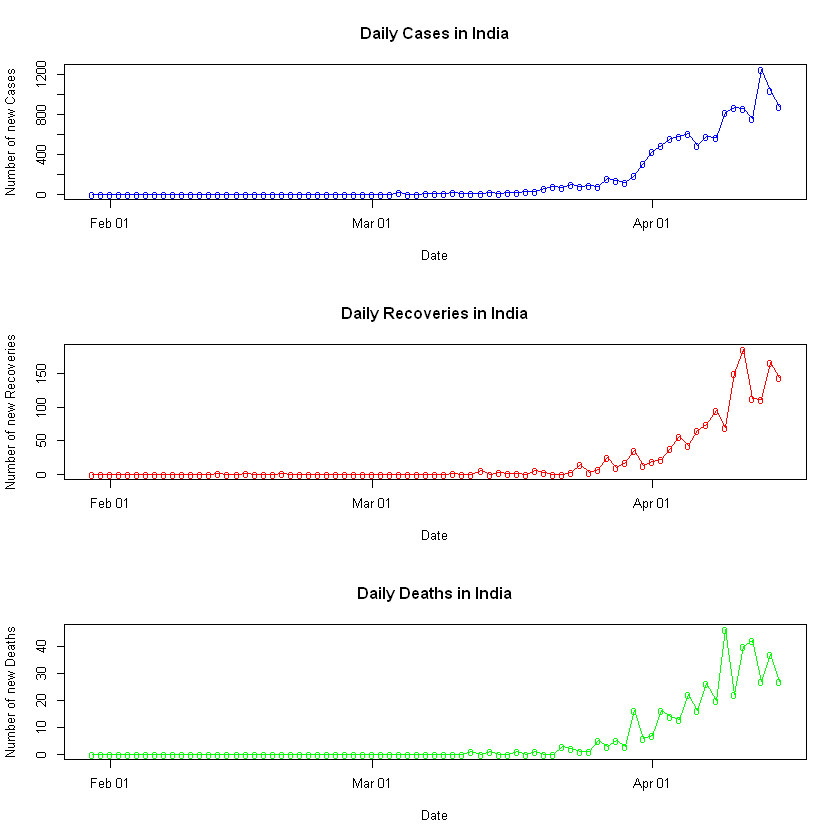

In [3]:
# Plotting Daily Data
par(mfrow = c(3,1)) # set up the graphics
plot(index(india.xts), india.xts$Daily.Confirmed, type="o", col="blue", pch="o", lty=1, main="Daily Cases in India", ylab="Number of new Cases", xlab="Date")
plot(index(india.xts), india.xts$Daily.Recovered, type="o", col="red", pch="o", lty=1, main="Daily Recoveries in India", ylab="Number of new Recoveries", xlab="Date")
plot(index(india.xts), india.xts$Daily.Deceased, type="o", col="green", pch="o", lty=1, main="Daily Deaths in India", ylab="Number of new Deaths", xlab="Date")

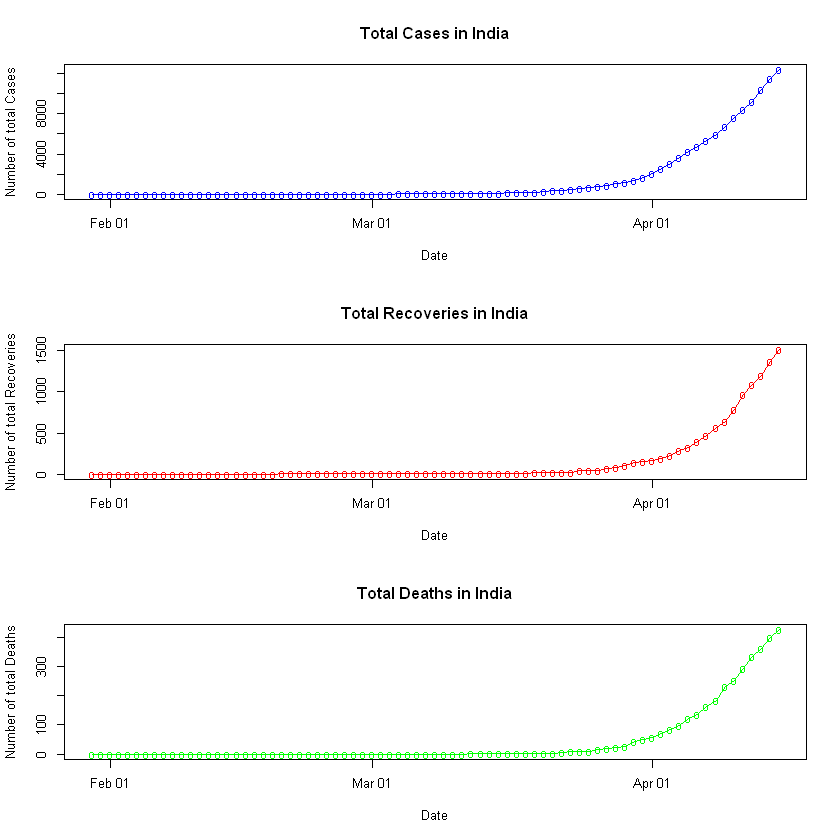

In [4]:
# Plotting Total Data
par(mfrow = c(3,1)) # set up the graphics
plot(index(india.xts), india.xts$Total.Confirmed, type="o", col="blue", pch="o", lty=1, main="Total Cases in India", ylab="Number of total Cases", xlab="Date")
plot(index(india.xts), india.xts$Total.Recovered, type="o", col="red", pch="o", lty=1, main="Total Recoveries in India", ylab="Number of total Recoveries", xlab="Date")
plot(index(india.xts), india.xts$Total.Deceased, type="o", col="green", pch="o", lty=1, main="Total Deaths in India", ylab="Number of total Deaths", xlab="Date")

##### Let's start the time series data from 20th March, as there is little information before that

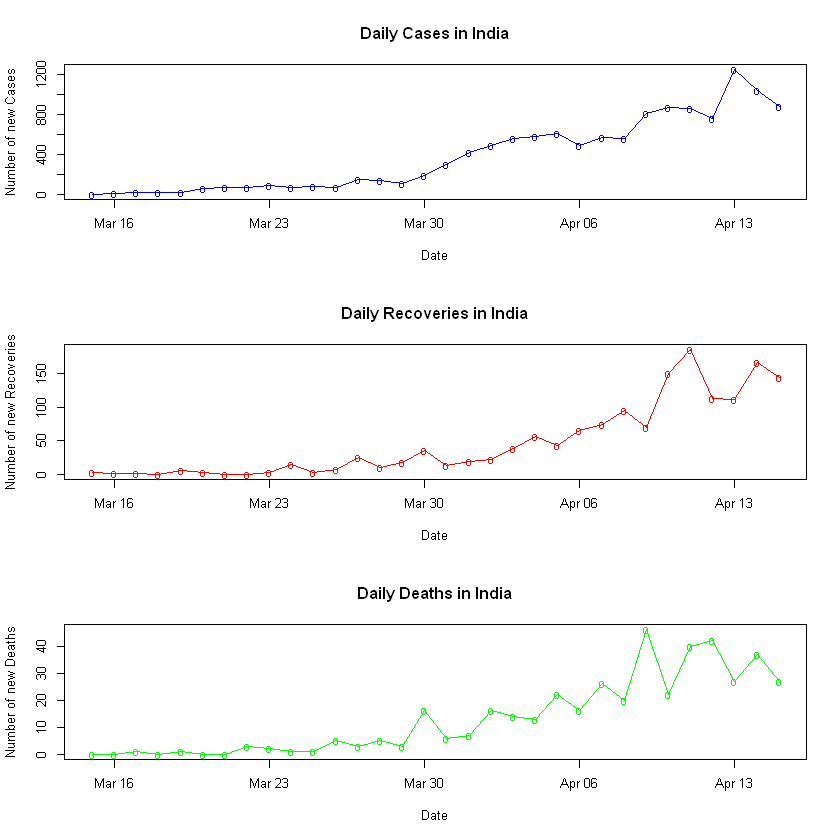

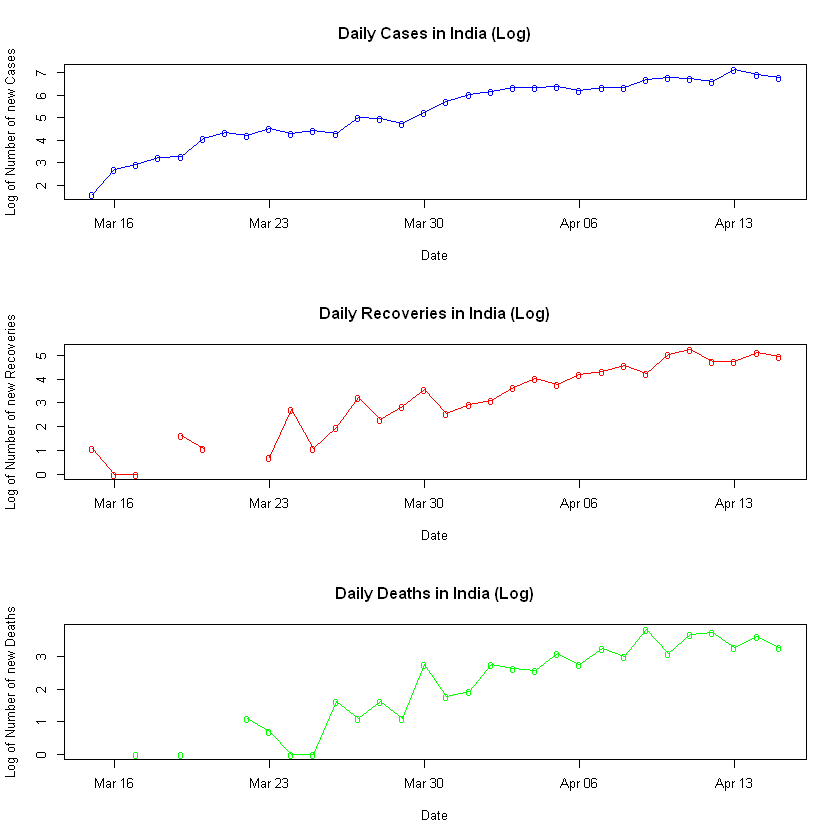

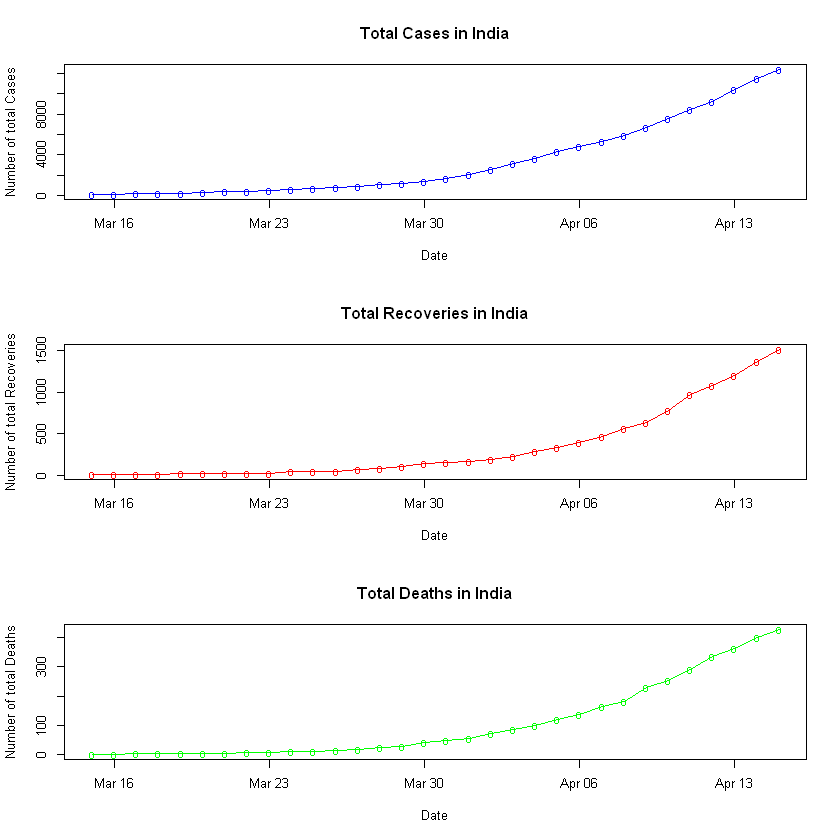

In [5]:
startDate <- as.Date("15-Mar" , format = "%d-%b")
newIndia.xts <- subset(india.xts, index(india.xts)>=startDate)
# newIndia.xts$Total.Confirmed <- as.numeric(newIndia.xts$Total.Confirmed)

# Plotting for newIndia
par(mfrow = c(3,1)) # set up the graphics
plot(index(newIndia.xts), newIndia.xts$Daily.Confirmed, type="o", col="blue", pch="o", lty=1, main="Daily Cases in India", ylab="Number of new Cases", xlab="Date")
plot(index(newIndia.xts), newIndia.xts$Daily.Recovered, type="o", col="red", pch="o", lty=1, main="Daily Recoveries in India", ylab="Number of new Recoveries", xlab="Date")
plot(index(newIndia.xts), newIndia.xts$Daily.Deceased, type="o", col="green", pch="o", lty=1, main="Daily Deaths in India", ylab="Number of new Deaths", xlab="Date")

par(mfrow = c(3,1)) # set up the graphics
plot(index(newIndia.xts), log(as.numeric(newIndia.xts$Daily.Confirmed)), type="o", col="blue", pch="o", lty=1, main="Daily Cases in India (Log)", ylab="Log of Number of new Cases", xlab="Date")
plot(index(newIndia.xts), log(as.numeric(newIndia.xts$Daily.Recovered)), type="o", col="red", pch="o", lty=1, main="Daily Recoveries in India (Log)", ylab="Log of Number of new Recoveries", xlab="Date")
plot(index(newIndia.xts), log(as.numeric(newIndia.xts$Daily.Deceased)), type="o", col="green", pch="o", lty=1, main="Daily Deaths in India (Log)", ylab="Log of Number of new Deaths", xlab="Date")

par(mfrow = c(3,1)) # set up the graphics
plot(index(newIndia.xts), newIndia.xts$Total.Confirmed, type="o", col="blue", pch="o", lty=1, main="Total Cases in India", ylab="Number of total Cases", xlab="Date")
plot(index(newIndia.xts), newIndia.xts$Total.Recovered, type="o", col="red", pch="o", lty=1, main="Total Recoveries in India", ylab="Number of total Recoveries", xlab="Date")
plot(index(newIndia.xts), newIndia.xts$Total.Deceased, type="o", col="green", pch="o", lty=1, main="Total Deaths in India", ylab="Number of total Deaths", xlab="Date")

## Time Series Model for Daily New Cases(with and without lockdown)

### Autocorrelation plot

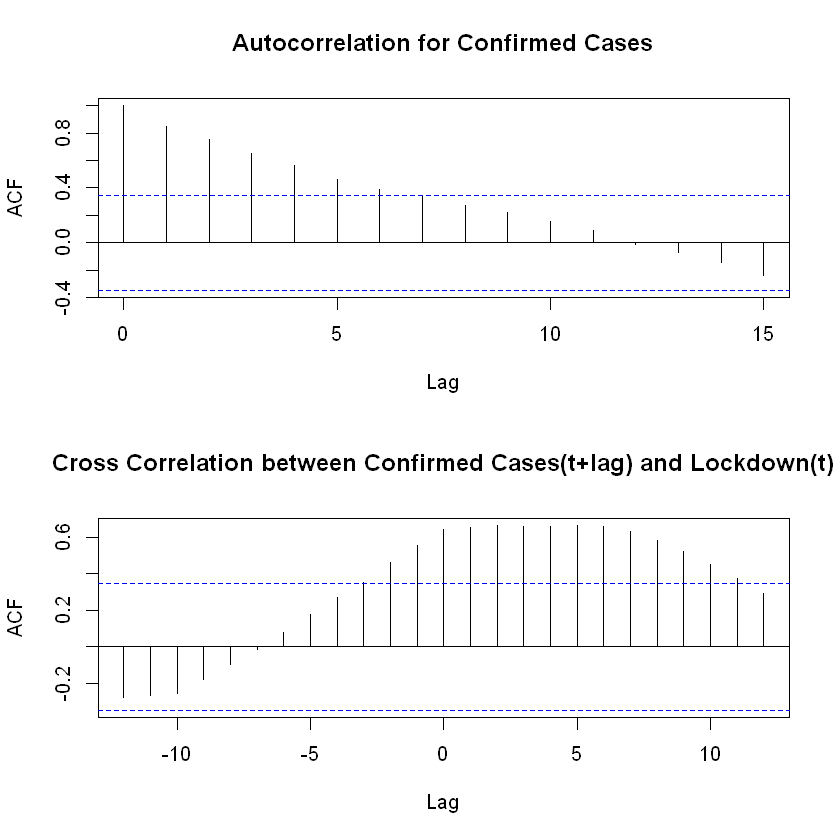

In [6]:
par(mfrow = c(2,1)) # set up the graphics
acf(log(as.numeric(newIndia.xts$Daily.Confirmed)), main="Autocorrelation for Confirmed Cases")
# acf(as.numeric(newIndia.xts$Lockdown), main="Autocorrelation for Lockdown")
ccf(as.numeric(newIndia.xts$Daily.Confirmed), as.numeric(newIndia.xts$Lockdown), main="Cross Correlation between Confirmed Cases(t+lag) and Lockdown(t)")

# d <- coredata(dailyConfirmed.xts)[, 'Daily.Confirmed']
# ccf(as.numeric((coredata(dailyConfirmed.xts)[, 'Lockdown'])), as.numeric((coredata(dailyConfirmed.xts)[, 'Daily.Confirmed'])))

In [24]:
# From the ccf plot above, lockdown at lag 0 to 10 is in significant region, let's put it in out model and see

# Date objects
DayZero <- as.Date("25-Mar" , format = "%d-%b")
DayOne <- as.Date("26-Mar" , format = "%d-%b")
DayTwo <- as.Date("27-Mar" , format = "%d-%b")
DayThree <- as.Date("28-Mar" , format = "%d-%b")
DayFour <- as.Date("29-Mar" , format = "%d-%b")
DayFive <- as.Date("30-Mar" , format = "%d-%b")
DaySix <- as.Date("31-Mar" , format = "%d-%b")
DaySeven <- as.Date("1-Apr" , format = "%d-%b")
DayEight <- as.Date("2-Apr" , format = "%d-%b")
DayNine <- as.Date("3-Apr" , format = "%d-%b")
DayTen <- as.Date("4-Apr" , format = "%d-%b")
DayEleven <- as.Date("5-Apr", format = "%d-%b")

# Creating columns
l1 <- (newIndia.xts$Lockdown)
l2 <- (newIndia.xts$Lockdown)
l3 <- (newIndia.xts$Lockdown)
l4 <- (newIndia.xts$Lockdown)
l5 <- (newIndia.xts$Lockdown)
l6 <- (newIndia.xts$Lockdown)
l7 <- (newIndia.xts$Lockdown)
l8 <- (newIndia.xts$Lockdown)
l9 <- (newIndia.xts$Lockdown)
l10 <- (newIndia.xts$Lockdown)
l11 <- (newIndia.xts$Lockdown)

l1 <- replace(l1, index(l1)<DayOne, "0")
l2 <- replace(l2, index(l2)<DayTwo, "0")
l3 <- replace(l3, index(l3)<DayThree, "0")
l4 <- replace(l4, index(l4)<DayFour, "0")
l5 <- replace(l5, index(l5)<DayFive, "0")
l6 <- replace(l6, index(l6)<DaySix, "0")
l7 <- replace(l7, index(l7)<DaySeven, "0")
l8 <- replace(l8, index(l8)<DayEight, "0")
l9 <- replace(l9, index(l9)<DayNine, "0")
l10 <- replace(l10, index(l10)<DayTen, "0")
l11 <- replace(l11, index(l11)<DayEleven, "0")

# Adding columns to newIndia.xts
newIndia.xts$Lockdown_1 <- l1
newIndia.xts$Lockdown_2 <- l2
newIndia.xts$Lockdown_3 <- l3
newIndia.xts$Lockdown_4 <- l4
newIndia.xts$Lockdown_5 <- l5
newIndia.xts$Lockdown_6 <- l6
newIndia.xts$Lockdown_7 <- l7
newIndia.xts$Lockdown_8 <- l8
newIndia.xts$Lockdown_9 <- l9
newIndia.xts$Lockdown_10 <- l10
newIndia.xts$Lockdown_11 <- l11

# Making the Data
# xreg.data <- data.frame(coredata(newIndia.xts$Lockdown), coredata(newIndia.xts$Lockdown_1), coredata(newIndia.xts$Lockdown_2), 
#                         coredata(newIndia.xts$Lockdown_3), coredata(newIndia.xts$Lockdown_4), coredata(newIndia.xts$Lockdown_5),
#                         coredata(newIndia.xts$Lockdown_6), coredata(newIndia.xts$Lockdown_7), coredata(newIndia.xts$Lockdown_8)
#                        , coredata(newIndia.xts$Lockdown_9), coredata(newIndia.xts$Lockdown_10))

# Making time squared trend to be fit
# Adding plus 1 kyunki baadme vo subtract ho jaayega
timeTrend_2 <- (1:length(index(newIndia.xts))) ^2 + 1
timeTrend <- (1:length(index(newIndia.xts))) + 1

xreg.data <- data.frame(coredata(newIndia.xts$Lockdown), timeTrend, timeTrend_2)

xreg.data.matrix <- data.matrix(xreg.data)-1
xreg.data.matrix

Lockdown,timeTrend,timeTrend_2
0,1,1
0,2,4
0,3,9
0,4,16
0,5,25
0,6,36
0,7,49
0,8,64
0,9,81
0,10,100


In [8]:
today = as.Date("17-Apr", format="%d-%b")
time <- (as.numeric(today-startDate):(as.numeric(today-startDate)+3))
time_2 <- time * time
time_3 <- time_2 * time
time
time_2
time_3

[1] 33 34 35 36

[1] 1089 1156 1225 1296

[1] 35937 39304 42875 46656

In [9]:
x <- 1
x <- "a"
print(x)

[1] "a"


Series: dataTimeSeries 
Regression with ARIMA(0,0,0) errors 

Coefficients:
      intercept  Lockdown  Lockdown_1  timeTrend  timeTrend_2
         1.7221   -0.6264     -0.1156     0.3688      -0.0058
s.e.     0.1638    0.2761      0.2638     0.0314       0.0008

sigma^2 estimated as 0.06798:  log likelihood=0.33
AIC=11.34   AICc=14.7   BIC=20.14

Time Series:
Start = 33 
End = 36 
Frequency = 1 
[1] 962.1636 945.3594 918.1969 881.5878

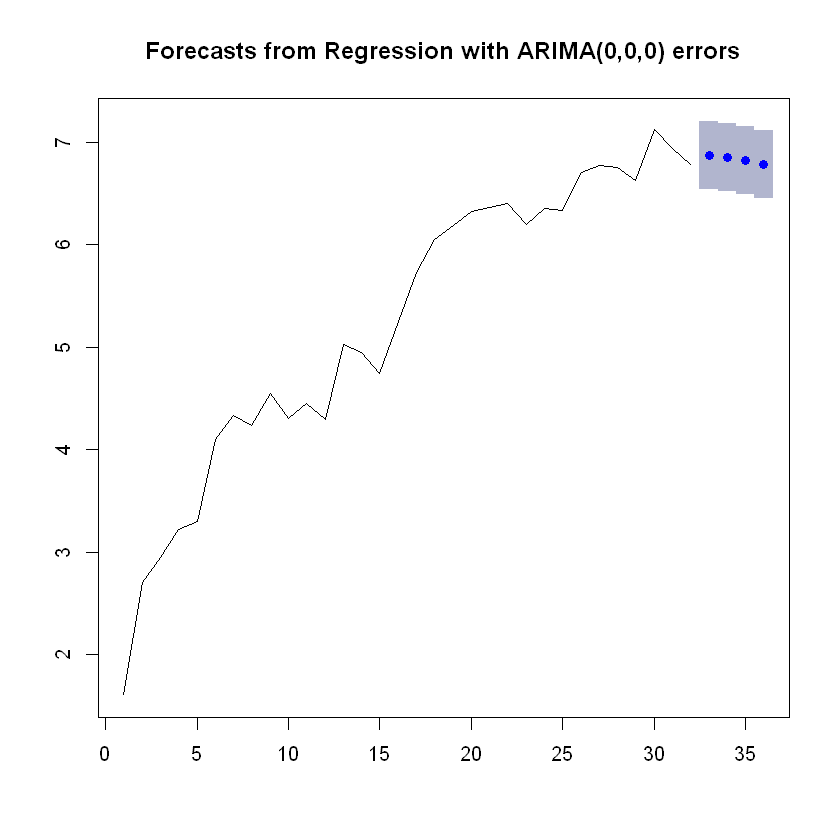

In [10]:
# India time series model, with variables like today's lockdown and 14 day before lockdown
# From the log curve we see a -x^2 trend too, maybe we can try to fit time square in the model

# Setting the time series and the regressors
dataTimeSeries <- log(as.numeric(newIndia.xts$Daily.Confirmed))
regressors <- xreg.data.matrix

# Fitting the model
fit <- auto.arima(dataTimeSeries, xreg=regressors, method="ML")
fit

# Custom ARIMA
# fit1 <- Arima(dataTimeSeries, order=c(0,1,0), xreg=regressors, method="ML",)
# fit1

# Setting the lockdown variable for future
today = as.Date("17-Apr", format="%d-%b")
lock <- sample(1:1, 4, replace = TRUE)
time <- (as.numeric(today-startDate):(as.numeric(today-startDate)+3))
time_2 <- time * time
lock.data <- data.frame(lock,lock,time,time_2)
colnames(lock.data)<- c("Lockdown","Lockdown_1", "timeTrend", "timeTrend_2")
lock.matrix <- data.matrix(lock.data)

# Forecast
fore <- forecast(fit, level=80,  xreg=lock.matrix)
plot(fore)
# (fore$mean)
exp((fore$mean))

In [11]:
# # India time series model, with variables like today's lockdown and 14 day before lockdown

# # Setting the time series and the regressors
# dataTimeSeries <- log(as.numeric(newIndia.xts$Daily.Confirmed))
# regressors <- xreg.data.matrix

# # Fitting the model
# fit <- auto.arima(log(as.numeric(newIndia.xts$Daily.Confirmed)), xreg=(xreg.data.matrix))
# fit

# # fit1 <- Arima(log(as.numeric(newIndia.xts$Daily.Confirmed)), order=c(0,1,0), xreg=(xreg.data.matrix), method="ML",)
# # fit1
# # fit1$aicc
# # fit$order

# # lock.data <- data.frame(lock,lock,lock,lock,lock,lock,lock,lock,lock,lock,lock)
# # colnames(lock.data)<- c("Lockdown","Lockdown_1","Lockdown_2","Lockdown_3","Lockdown_4","Lockdown_5","Lockdown_6"
# #                        ,"Lockdown_7","Lockdown_8","Lockdown_9","Lockdown_10")

# # Setting the lockdown variable for future
# lock <- sample(1:1, 4, replace = TRUE)
# lock.data <- data.frame(lock,lock)
# colnames(lock.data)<- c("Lockdown","Lockdown_1")
# lock.matrix <- data.matrix(lock.data)
# # lock.matrix
# # dim(lock.matrix)
# # fit1$x
# # residuals(fit1)
# # lock

# # Forecast
# fore <- forecast(fit1, level=0,  xreg=lock.matrix)
# # fore$model
# # fore
# plot(fore)
# # exp(fore$lower)
# # exp(fore$upper)
# # (fore$mean)
# exp((fore$mean))
# # plot(fore)
# # fit1$coef

In [12]:
# Plotting residuals
par(mfrow = c(3,1)) # set up the graphics
pacf(log(as.numeric(newIndia.xts$Daily.Confirmed)), main="Partial Autocorrelation for Confirmed Cases")
acf(residuals(fit1), main="Autocorrelation for Residuals")
ccf(log(as.numeric(newIndia.xts$Daily.Confirmed)), residuals(fit1) , main="Cross Correlation between Confirmed Cases(t+lag) and Residuals(t)")


ERROR: Error in residuals(fit1): object 'fit1' not found


In [13]:
# Writing a function to automatically select the best model based on AIC criterion/ can also do on forecasts(maybe after a couple of days, on saturday)
tempAIC <- 10000
iteration1 <- c(0,1,2,3)
iteration2 <- c(0,1,2)
trueOrFalse <- c(TRUE, FALSE)
p <- 0
d <- 0
q <- 0
includeMean <- FALSE
includeConstant <- FALSE
includeDrift <- FALSE
count <- 0
timeSeries <- log(as.numeric(newIndia.xts$Daily.Confirmed))
regressors <- xreg.data.matrix

for (tempP in iteration1){
    for (tempD in iteration2){
        for(tempQ in iteration1){
            for(tempIncludeMean in trueOrFalse){
                for(tempIncludeConstant in trueOrFalse){
                    for(tempIncludeDrift in trueOrFalse){
                        tempFit <- Arima(timeSeries, order=c(tempP,tempD,tempQ), xreg=regressors, include.mean=tempIncludeMean,
                                        include.drift=tempIncludeDrift, include.constant=tempIncludeConstant, method="ML")
                        if(tempFit$aicc < tempAIC){
                            tempAIC <- tempFit$aicc
                            p <- tempP
                            d <- tempD
                            q <- tempQ
                            includeMean <- tempIncludeMean
                            includeConstant <- tempIncludeConstant
                            includeDrift <- tempIncludeDrift
                        }
                    }
                }
            }
        }
    }
}
print(tempAIC)
print(p)
print(d)
print(q)
print(includeMean)
print(includeConstant)
print(includeDrift)

ERROR: Error in solve.default(res$hessian * n.used, A): system is computationally singular: reciprocal condition number = 4.93836e-33


In [14]:
fit <- Arima(timeSeries, order=c(p,d,q), xreg=regressors, include.mean=includeMean,
                                        include.drift=includeDrift, include.constant=includeConstant, method="ML")
summary(fit)
lock.data <- data.frame(lock,lock)
colnames(lock.data)<- c("Lockdown","Lockdown_1")
lock.matrix <- data.matrix(lock.data)
fore <- forecast(fit1, level=80,  xreg=lock.matrix)
plot(fore)
exp((fore$mean))

Series: timeSeries 
Regression with ARIMA(0,0,0) errors 

Coefficients:
      Lockdown  Lockdown_1  timeTrend  timeTrend_2
       -1.3225     -0.7007     0.6610      -0.0123
s.e.    0.5658      0.5442     0.0308       0.0009

sigma^2 estimated as 0.2921:  log likelihood=-23.58
AIC=57.16   AICc=59.46   BIC=64.49

Training set error measures:
                    ME      RMSE       MAE      MPE     MAPE     MASE      ACF1
Training set 0.1151004 0.5055438 0.3702091 5.122252 10.07489 1.406224 0.6906736


ERROR: Error in forecast(fit1, level = 80, xreg = lock.matrix): object 'fit1' not found


In [ ]:
forecast(finalModel, )

In [28]:
# Making two beta waala model using auto-ARIMA and new datasets
nrows <- length(xreg.data$timeTrend)
print(nrows)
# Making a data with 6 columns, we can change entries according to the date
# Format-> Lockdown|Lockdown_1|time_trend_1|squared_time_trend_1|time_trend_2|squared_time_trend_2
modXreg.data <- xreg.data
# modXreg.data <- cbind(xreg.data,time_trend_2=xreg.data$timeTrend,squared_time_trend_2=xreg.data$timeTrend_2)
colnames(modXreg.data)<- c("Lockdown", "time_trend_1", "squared_time_trend_1")
# modXreg.data

# ARIMA Initialisation
dataTimeSeries <- log(as.numeric(newIndia.xts$Daily.Confirmed))
aicLevel <- 1000
# etaDate = today
regressors <- data.matrix(modXreg.data)-1
finalModel <- lm(dataTimeSeries ~ regressors)

# StartDate = 15th March
# Today = 17th April

# for (eta in (3:(nrows-2))){
#     tempXreg.data <- modXreg.data
#     for (tempEta_2 in (1:(eta-1))){
#         tempXreg.data[tempEta_2,"time_trend_2"] <- 1
#         tempXreg.data[tempEta_2,"squared_time_trend_2"] <- 1
#     }
#     for (tempEta_1 in (eta:nrows)){
#         tempXreg.data[tempEta_1,"time_trend_1"] <- 1
#         tempXreg.data[tempEta_1,"squared_time_trend_1"] <- 1
#     }
    
#     tempXreg.matrix <- data.matrix(tempXreg.data)-1
#     regressors <- tempXreg.matrix
#     tempFit <- auto.arima(dataTimeSeries, xreg=regressors, method="ML")
#     if(tempFit$aicc < aicLevel){
#         aicLevel <- tempFit$aicc
#         etaDate <- as.Date(startDate + eta)
#         finalModel <- tempFit
#     }
# }
# print(etaDate)
summary(finalModel)

[1] 32



Call:
lm(formula = dataTimeSeries ~ regressors)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.51800 -0.16106  0.03514  0.18591  0.36887 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     1.7372660  0.1716433  10.121 7.37e-11 ***
regressorsLockdown             -0.7085987  0.2173547  -3.260  0.00292 ** 
regressorstime_trend_1          0.3656993  0.0327990  11.150 8.26e-12 ***
regressorssquared_time_trend_1 -0.0057219  0.0007882  -7.259 6.66e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2568 on 28 degrees of freedom
Multiple R-squared:  0.9718,	Adjusted R-squared:  0.9688 
F-statistic: 322.1 on 3 and 28 DF,  p-value: < 2.2e-16


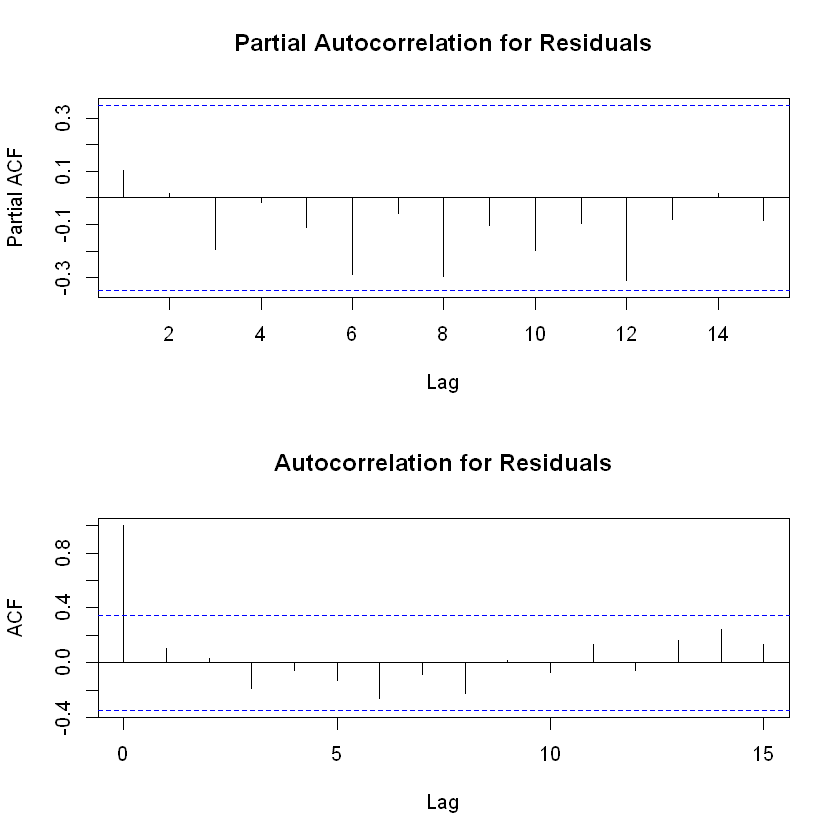

In [31]:
residual <- (finalModel$residuals)
# Plotting residuals
par(mfrow = c(2,1)) # set up the graphics
pacf((residual), main="Partial Autocorrelation for Residuals")
acf((residual), main="Autocorrelation for Residuals")

In [38]:
time <- ((as.numeric(lastDate-startDate)+2):(as.numeric(today-startDate)+3))
time

[1] 33 34 35 36

In [47]:
# Forecasting the above model
# Setting the lockdown variable for future
lastDate <- index(newIndia.xts)[nrows]
# today = as.Date("17-Apr", format="%d-%b")
lock <- sample(1:1, 4, replace = TRUE)
time_Before <- c(0,0,0,0)
time <- ((as.numeric(lastDate-startDate)+2):(as.numeric(lastDate-startDate)+5))
time_2 <- time * time

# regressor.data <- data.frame(lock,time_Before,time_Before,time,time_2)
regressor.data <- data.frame(lock,time,time_2)

colnames(regressor.data)<- c("Lockdown", "time_trend_1", "squared_time_trend_1")
regressor.matrix <- data.matrix(regressor.data)

# Forecast
fore <- forecast(finalModel, h=4,  newdata=regressor.data)
summary(fore)
# plot(fore)
# (fore$mean)
exp((fore$mean))


Forecast method: Linear regression model

Model Information:

Call:
lm(formula = dataTimeSeries ~ regressors)

Coefficients:
                   (Intercept)              regressorsLockdown  
                      1.737266                       -0.708599  
        regressorstime_trend_1  regressorssquared_time_trend_1  
                      0.365699                       -0.005722  


Error measures:
                       ME      RMSE       MAE        MPE     MAPE      MASE
Training set 2.081668e-17 0.2402127 0.1998824 -0.5451367 4.764701 0.1613074

Forecasts:
  Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1       6.865575 6.477530 7.253621 6.259969 7.471182
2       6.847906 6.446386 7.249426 6.221270 7.474542
3       6.818793 6.401202 7.236384 6.167075 7.470511
4       6.778236 6.341841 7.214631 6.097172 7.459301


1        2        3        4 
958.6973 941.9066 914.8801 878.5177

In [ ]:
# Plotting residuals
par(mfrow = c(2,1)) # set up the graphics
pacf(log(as.numeric(newIndia.xts$Daily.Confirmed)), main="Partial Autocorrelation for Confirmed Cases")
acf(residuals(finalModel), main="Autocorrelation for Residuals")

## Doing the forecasting for states